
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## Obtain probabilites of changing category between radiuses based on Nakajo tracks

inputs required: 
  * Nakajo tracks
  
in this notebook:
  * matrix of probabilites of change

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import warnings
warnings.filterwarnings('ignore')
# common
import os
import os.path as op

# pip
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit 
from teslakit.database import Database
from teslakit.storms import Extract_Circle, GetCategoryChangeProbs

from teslakit.plotting.storms import Plot_Category_Change


In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/laurac/Dropbox/Majuro_training/teslakit/DATA'
db = Database(p_data)

# set site
db.SetSite('MAJURO-training')


## Database and Site parameters

In [3]:
# --------------------------------------
# load data and set parameters

TCs_Nakajo = db.Load_TCs_Nakajo()  # Nakajo simulations

# wave point longitude and latitude
pnt_lon = 171.18
pnt_lat = 7.11

# radius for TCs selection (º)
r1 = 14
r2 = 4



## Synthetic TCs - Category Change Probabilities

In [4]:
# --------------------------------------
# Select Nakajo TCs inside circle

# dictionary with needed variable names
d_vns = {
    'longitude':'ylon_TC',
    'latitude':'ylat_TC',
    'time': 'yts',
    'pressure':'yCPRES',
}

# Extract TCs inside R=14 and positions
_, TCs_r1 = Extract_Circle(TCs_Nakajo, pnt_lon, pnt_lat, r1, d_vns)
print(TCs_r1)

# Extract TCs inside R=4 and positions
_, TCs_r2 = Extract_Circle(TCs_Nakajo, pnt_lon, pnt_lat, r2, d_vns)
print(TCs_r2)


<xarray.Dataset>
Dimensions:        (storm: 48417)
Coordinates:
  * storm          (storm) int64 5 8 14 50 52 ... 999974 999982 999986 999990
Data variables:
    pressure_min   (storm) float64 986.5 961.8 990.2 ... 977.5 991.0 1.006e+03
    pressure_mean  (storm) float64 989.9 978.1 996.0 ... 996.9 999.1 1.007e+03
    velocity_mean  (storm) float64 178.0 10.49 24.47 52.79 ... 10.88 18.02 5.896
    gamma          (storm) float64 113.5 176.8 67.95 56.34 ... 154.6 118.5 132.2
    delta          (storm) float64 108.1 262.1 8.491 6.45 ... 177.1 130.7 135.5
    category       (storm) int64 1 3 1 1 0 0 0 0 2 1 5 ... 3 1 1 1 4 1 2 0 2 1 0
    dmin_date      (storm) float64 42.8 48.0 36.0 262.5 9.0 ... 1.5 0.0 0.0 0.0
    last_date      (storm) float64 54.4 288.0 259.5 400.5 ... 150.0 259.5 177.0
    index_in       (storm) int64 57 10 3 92 0 0 3 9 159 0 ... 0 0 47 0 0 0 0 0 0
    index_out      (storm) int64 81 24 23 104 4 6 31 18 ... 48 10 14 9 26 24 2
Attributes:
    point_lon:  171.18
    po

In [5]:
# --------------------------------------
# Calculate Syntethic TCs category change probabilities

categ_cp = GetCategoryChangeProbs(TCs_r1, TCs_r2)
print(categ_cp)

db.Save_TCs_probs_synth(categ_cp)


<xarray.Dataset>
Dimensions:                  (category: 6)
Coordinates:
  * category                 (category) int64 0 1 2 3 4 5
Data variables:
    category_change_count    (category, category) int64 1401 1354 389 ... 0 118
    category_change_probs    (category, category) float64 0.08016 ... 0.07096
    category_nochange_probs  (category) float64 0.9198 0.8469 ... 0.4265 0.6374
    category_change_cumsum   (category, category) float64 0.08016 ... 0.3626


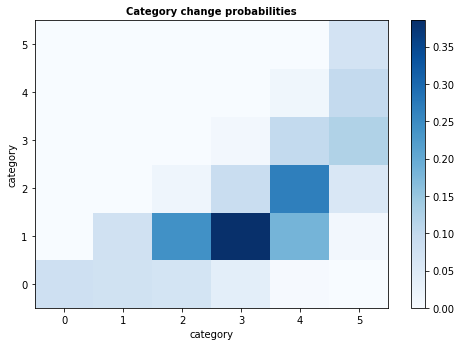

In [6]:
# plot category change probabilities

Plot_Category_Change(categ_cp);
